In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_c16 = pd.read_csv('cleaned_data.csv', index_col=0)

In [2]:
df_c16 = df_c16.apply(lambda x: x.astype('category'))
df_c16['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].cat.as_ordered()

0       1
1       2
2       3
4       3
5       2
6       2
7       1
8       5
10      1
11      4
12      1
13      2
14      1
15      3
16      5
17      0
19      0
20      1
21      2
22      1
23      4
25      1
26      5
27      4
28      3
29      2
30      2
31      1
32      1
34      1
       ..
1398    1
1399    2
1400    1
1401    0
1402    0
1403    4
1405    0
1406    4
1407    0
1409    3
1410    5
1411    1
1412    3
1413    2
1414    5
1415    5
1416    2
1417    5
1418    3
1419    2
1421    1
1422    0
1423    2
1424    4
1425    2
1426    2
1427    2
1430    4
1431    4
1432    5
dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [3]:
sns.set_style('whitegrid')

# I. Mental health Vs. Physical health in tech career

In [4]:
ph_interview = df_c16['Would you be willing to bring up a physical health issue with a potential employer in an interview?']
mh_interview = df_c16['Would you bring up a mental health issue with a potential employer in an interview?']
mh_career = df_c16['Do you feel that being identified as a person with a mental health issue would hurt your career?']
mh_view_as_negative = df_c16['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?']


In [5]:
# simplifier the answers 
mh_career = mh_career.replace(["Yes, I think it would", "Yes, it has"], "Yes")
mh_career = mh_career.replace(["No, I don't think it would", "No, it has not"], "No")
mh_view_as_negative = mh_view_as_negative.replace(["Yes, I think they would", "Yes, they do"], "Yes")
mh_view_as_negative = mh_view_as_negative.replace(["No, I don't think they would", "No, they do not"], "No")

In [6]:
df_career_effect = pd.DataFrame()
df_career_effect['ph_interview'] = ph_interview.value_counts()
df_career_effect['mh_interview'] = mh_interview.value_counts()
df_career_effect['mh_career'] = mh_career.value_counts()
df_career_effect['mh_view_as_negative'] = mh_view_as_negative.value_counts()

In [7]:

df_career_effect

,ph_interview,mh_interview,mh_career,mh_view_as_negative
Maybe,483,333,472,461
No,371,721,146,347
Yes,292,92,528,338


In [8]:
df_career_effect.reset_index()

,index,ph_interview,mh_interview,mh_career,mh_view_as_negative
0,Maybe,483,333,472,461
1,No,371,721,146,347
2,Yes,292,92,528,338


In [9]:
df_career_effect['Answers'] = df_career_effect.index


In [10]:
melted = pd.melt(df_career_effect, id_vars=['Answers'], var_name='type', value_name='frequency')

In [11]:
melted

,Answers,type,frequency
0,Maybe,ph_interview,483
1,No,ph_interview,371
2,Yes,ph_interview,292
3,Maybe,mh_interview,333
4,No,mh_interview,721
5,Yes,mh_interview,92
6,Maybe,mh_career,472
7,No,mh_career,146
8,Yes,mh_career,528
9,Maybe,mh_view_as_negative,461


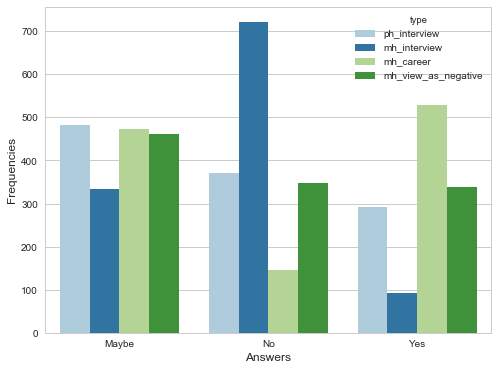

In [12]:
plt.clf()
plt.subplots(figsize=(8, 6))
_ = sns.barplot(x='Answers', y='frequency', hue='type', data=melted, palette="Paired")
plt.xlabel('Answers', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.show()

### **In contrast to physical health, most people in tech would refute to say mental health problem when being interviewed on job application. And if being identified as a person with mental health issue, very few people would feel it will not have negative effect on their career. 

# II. Mental health issue with consequential affect

In [13]:
df_consequencial_affect = pd.DataFrame()
df_consequencial_affect['discuss_mh_with_employer'] = df_c16['Do you think that discussing a mental health disorder with your employer would have negative consequences?']
df_consequencial_affect['discuss_ph_with_employer'] = df_c16['Do you think that discussing a physical health issue with your employer would have negative consequences?']
df_consequencial_affect['discuss_mh_with_coworker'] = df_c16['Would you feel comfortable discussing a mental health disorder with your coworkers?']
df_consequencial_affect['discuss_mh_with_direct_supervisor'] = df_c16['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?']
df_consequencial_affect['mh_equal_ph'] = df_c16['Do you feel that your employer takes mental health as seriously as physical health?']
df_consequencial_affect['mh_of_coworker'] = df_c16['Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?']
df_consequencial_affect['mh_negative_consequence'] = df_c16['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?']
df_consequencial_affect['share_with_friends_or_family'] = df_c16['How willing would you be to share with friends and family that you have a mental illness?']
df_consequencial_affect['badly_response_experience'] = df_c16['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?']
df_consequencial_affect['hesitate_to_reveal_due_to_others'] = df_c16['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?']
df_consequencial_affect['mh_in_past'] = df_c16['Have you had a mental health disorder in the past?']
df_consequencial_affect['mh_currently'] = df_c16['Do you currently have a mental health disorder?']
df_consequencial_affect['mh_treated_well'] = df_c16['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?']
df_consequencial_affect['mh_treated_bad'] = df_c16['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?']

In [14]:
df_consequencial_affect.describe()

,discuss_mh_with_employer,discuss_ph_with_employer,discuss_mh_with_coworker,discuss_mh_with_direct_supervisor,mh_equal_ph,mh_of_coworker,mh_negative_consequence,share_with_friends_or_family,badly_response_experience,hesitate_to_reveal_due_to_others,mh_in_past,mh_currently,mh_treated_well,mh_treated_bad
count,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
unique,3,3,3,3,3,2,5,6,3,3,3,3,5,5
top,Maybe,No,Maybe,Yes,I don't know,No,Maybe,Somewhat open,No,Maybe,Yes,Yes,Not applicable to me,Often
freq,487,837,479,428,493,1048,461,514,491,767,583,451,455,422


In [15]:
df_consequencial_affect['mh_equal_ph'] = df_consequencial_affect['mh_equal_ph'].replace(["I don't know"], 'Maybe')

### 1. Negative views by team menbers/co-workers

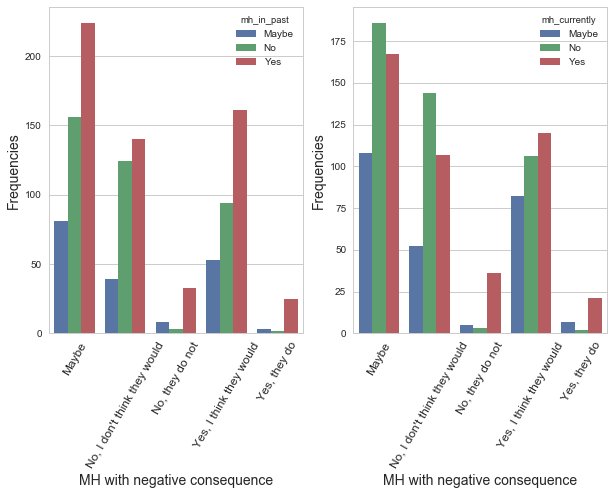

In [16]:
plt.clf()
plt.subplots(figsize=(10, 6))
labels = ["Maybe", "No, I don't think they would", "No, they do not", "Yes, I think they would", "Yes, they do"]
plt.subplot(1, 2, 1)
_ = sns.countplot(x='mh_negative_consequence', hue='mh_in_past', data=df_consequencial_affect)
plt.xticks(np.arange(5), labels, fontsize=12, rotation=60)
plt.xlabel('MH with negative consequence', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)
plt.subplot(1, 2, 2)
_ = sns.countplot(x='mh_negative_consequence', hue='mh_currently', data=df_consequencial_affect)
plt.xticks(np.arange(5), labels, fontsize=12, rotation=60)
plt.xlabel('MH with negative consequence', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)
plt.show()

### ** The number of people currently with mh issue is lower than that in the past ( 451 Vs. 583). This may inform us that people pay more attention on their mental health and some people do get well treatment. 
### ** If being revealed with mh issue, what every in the past or currently, most people feel they may be viewed more negatively by their team members or coworkers. The number of people, who with mh problems, when being known with mh problem will have negative views by team members or coworkers, is getting fewer. This may due to the working environment are imporved and people are much more trusted by each other.

### 2. Share with friends/family or not?

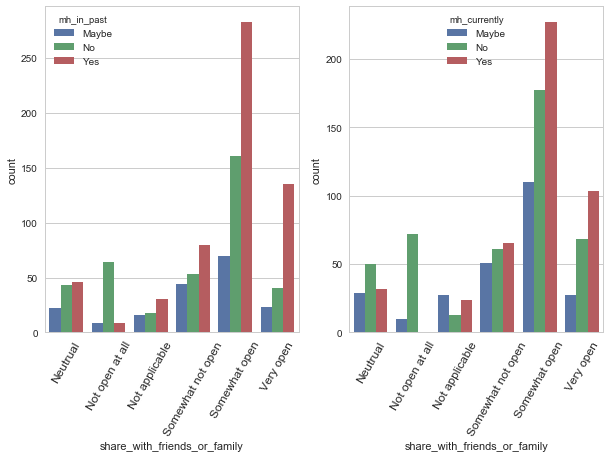

In [17]:
plt.clf()
plt.subplots(figsize=(10, 6))
labels = ["Neutrual", "Not open at all", "Not applicable", "Somewhat not open", "Somewhat open", "Very open"]
plt.subplot(1, 2, 1)
_ = sns.countplot(x='share_with_friends_or_family', hue='mh_in_past', data=df_consequencial_affect)
plt.xticks(np.arange(6), labels, fontsize=12, rotation=60)
plt.subplot(1, 2, 2)
_ = sns.countplot(x='share_with_friends_or_family', hue='mh_currently', data=df_consequencial_affect)
plt.xticks(np.arange(6), labels, fontsize=12, rotation=60)
plt.show()

### ** Most people thought they are somewhat open to their friends or family. Actually those suffering from mh issue do share the information with their friends or family.

### 3. Relationship between mh treatment and work affection

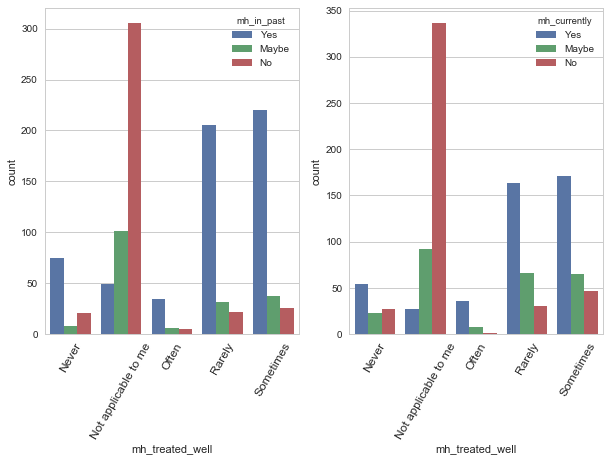

In [18]:
plt.clf()
plt.subplots(figsize=(10, 6), sharey=True)
labels = ['Never', 'Not applicable to me', 'Often', 'Rarely', 'Sometimes']
plt.subplot(1, 2, 1)
_ = sns.countplot(x='mh_treated_well', hue='mh_in_past', hue_order=['Yes', 'Maybe', 'No'], data=df_consequencial_affect)
plt.xticks(np.arange(5), labels, fontsize=12, rotation=60)
plt.subplot(1, 2, 2)
_ = sns.countplot(x='mh_treated_well', hue='mh_currently', hue_order=['Yes', 'Maybe', 'No'], data=df_consequencial_affect)
plt.xticks(np.arange(5), labels, fontsize=12, rotation=60)
plt.show()

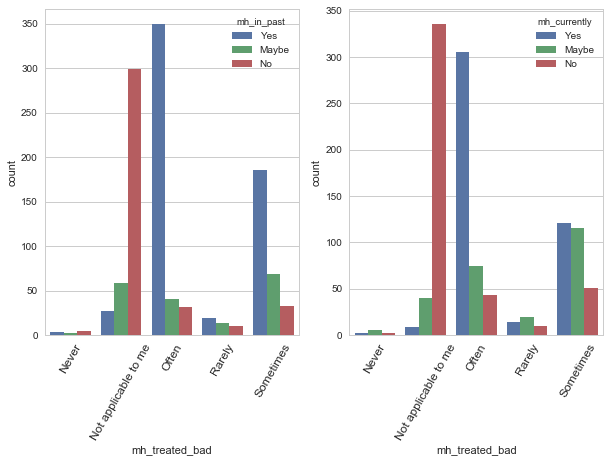

In [19]:
plt.clf()
plt.subplots(figsize=(10, 6))
labels = ['Never', 'Not applicable to me', 'Often', 'Rarely', 'Sometimes']
plt.subplot(1, 2, 1)
_ = sns.countplot(x='mh_treated_bad', hue='mh_in_past', hue_order=['Yes', 'Maybe', 'No'], data=df_consequencial_affect)
plt.xticks(np.arange(5), labels, fontsize=12, rotation=60)
plt.subplot(1, 2, 2)
_ = sns.countplot(x='mh_treated_bad', hue='mh_currently', hue_order=['Yes', 'Maybe', 'No'], data=df_consequencial_affect)
plt.xticks(np.arange(5), labels, fontsize=12, rotation=60)
plt.show()

** Compared who has mh issue in the past with who currently suffer mh issue, all the answers have almost the same distribution. Most healthy people don't take care about how the mh issue is treated. And those suffering from mh issue feel their work will be often interfered by the bad treatment. Even being well treated with mh issue, people still sometime may feel being interfered on their work, those not being well treated shows significant sure they are often getting interfered on their work.
#### ** So having best treatment when people suffering mh issue is such important.

### Due to mh_in_past and mh_currently have almost the same distribution on above analyses, I only pick mh_currently in the following analyses. 

## 4. mh issue in work place

In [20]:
df_consequencial_affect.describe()

,discuss_mh_with_employer,discuss_ph_with_employer,discuss_mh_with_coworker,discuss_mh_with_direct_supervisor,mh_equal_ph,mh_of_coworker,mh_negative_consequence,share_with_friends_or_family,badly_response_experience,hesitate_to_reveal_due_to_others,mh_in_past,mh_currently,mh_treated_well,mh_treated_bad
count,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
unique,3,3,3,3,3,2,5,6,3,3,3,3,5,5
top,Maybe,No,Maybe,Yes,Maybe,No,Maybe,Somewhat open,No,Maybe,Yes,Yes,Not applicable to me,Often
freq,487,837,479,428,493,1048,461,514,491,767,583,451,455,422


In [21]:
df_ana = pd.DataFrame()
df_ana['discuss_mh_with_employer'] = df_consequencial_affect['discuss_mh_with_employer'].value_counts()
df_ana['discuss_ph_with_employer'] = df_consequencial_affect['discuss_ph_with_employer'].value_counts()
df_ana['discuss_mh_with_coworker'] = df_consequencial_affect['discuss_mh_with_coworker'].value_counts()
df_ana['discuss_mh_with_direct_supervisor'] = df_consequencial_affect['discuss_mh_with_direct_supervisor'].value_counts()
df_ana['mh_equal_ph'] = df_consequencial_affect['mh_equal_ph'].value_counts()
df_ana['mh_of_coworker'] = df_consequencial_affect['mh_of_coworker'].value_counts()
df_ana['badly_response_experience'] = df_consequencial_affect['badly_response_experience'].value_counts()
df_ana['hesitate_to_reveal_due_to_others'] = df_consequencial_affect['hesitate_to_reveal_due_to_others'].value_counts()

In [22]:
df_ana['Answers'] = df_ana.index

In [23]:
df_ana.reset_index()

,index,discuss_mh_with_employer,discuss_ph_with_employer,discuss_mh_with_coworker,discuss_mh_with_direct_supervisor,mh_equal_ph,mh_of_coworker,badly_response_experience,hesitate_to_reveal_due_to_others,Answers
0,Maybe,487,268,479,382,493,NaN,330,767,Maybe
1,No,438,837,392,336,303,1048.0,491,198,No
2,Yes,221,41,275,428,350,98.0,325,181,Yes


In [24]:
melted = pd.melt(df_ana, id_vars=['Answers'], var_name='type', value_name='frequency')

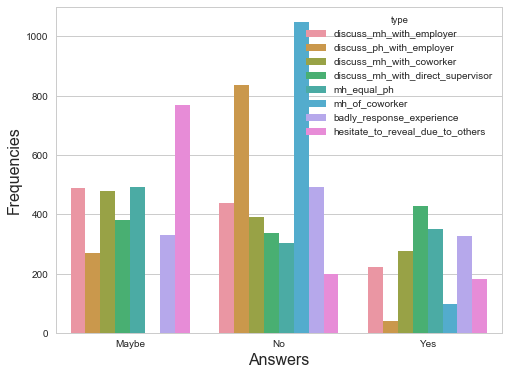

In [25]:
plt.clf()
plt.subplots(figsize=(8, 6))
_ = sns.barplot(x='Answers', y='frequency', data=melted, hue='type')
plt.xlabel('Answers', fontsize=16)
plt.ylabel('Frequencies', fontsize=16)
plt.show()


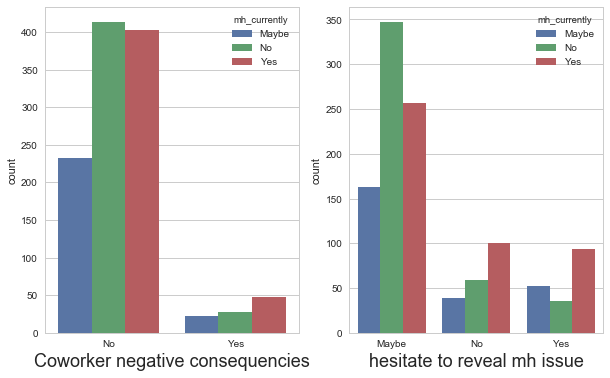

In [26]:
plt.clf()
plt.subplots(figsize=(10, 6))

plt.subplot(1, 2, 1)
_ = sns.countplot(x='mh_of_coworker', hue='mh_currently', data=df_consequencial_affect)
plt.xlabel('Coworker negative consequencies', fontsize=18)
plt.subplot(1, 2, 2)
_ = sns.countplot(x='hesitate_to_reveal_due_to_others', hue='mh_currently', data=df_consequencial_affect)
plt.xlabel('hesitate to reveal mh issue', fontsize=18)
plt.show()

** Most people never heard or observed negative consequence when coworker opened their mental health issue in the work place. Most people think they may suffer a negative consequence when their mantal health issue being revealed. So they may hesitate to reveal mental health issue in their workplace even though they haven't heard or observed their coworker's experience about mental health issue.

# III. The relation with age, gender, company size, self_employed, remote

In [27]:
relation = pd.DataFrame()
relation['company_size'] = df_c16['company_size']
relation['tech_company'] = df_c16['Is your employer primarily a tech company/organization?']
relation['tech_related'] = df_c16['Is your primary role within your company related to tech/IT?']
relation['enterprise_mh_benefit'] = df_c16['Does your employer provide mental health benefits as part of healthcare coverage?']
relation['enterprise_mh_options'] = df_c16['Do you know the options for mental health care available under your employer-provided coverage?']
relation['enterprise_mh_emphasis'] = df_c16['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
relation['enterprise_offer_resources'] = df_c16['Does your employer offer resources to learn more about mental health concerns and options for seeking help?']
relation['anonymity_protection'] = df_c16['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?']
relation['mh_leave_request'] = df_c16['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:']
relation['mh_currently'] = df_c16['Do you currently have a mental health disorder?']
relation['diagnosed'] = df_c16['Have you been diagnosed with a mental health condition by a medical professional?']
relation['family_history'] = df_c16['Do you have a family history of mental illness?']
relation['sought_treatment'] = df_c16['Have you ever sought treatment for a mental health issue from a mental health professional?']
relation['age'] = df_c16['What is your age?']
relation['gender'] = df_c16['What is your gender?']
relation['remote'] = df_c16['Do you work remotely?']
relation['age_class'] = df_c16['age_class']

In [28]:
relation.describe()

,company_size,tech_company,tech_related,enterprise_mh_benefit,enterprise_mh_options,enterprise_mh_emphasis,enterprise_offer_resources,anonymity_protection,mh_leave_request,mh_currently,diagnosed,family_history,sought_treatment,age,gender,remote,age_class
count,1146,1146.0,1146.0,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
unique,6,2.0,2.0,4,3,3,3,3,6,3,2,3,2,49,3,3,5
top,3,1.0,1.0,Yes,I am not sure,No,No,I don't know,2,Yes,No,Yes,1,30,Male,Sometimes,3
freq,292,883.0,883.0,531,485,813,531,742,281,451,579,541,657,77,850,611,542


In [29]:
relation['enterprise_mh_benefit'] = relation['enterprise_mh_benefit'].replace(['Not eligible for coverage / N/A'], "No")

In [30]:
relation['enterprise_mh_benefit'].value_counts()

Yes                                531
I don't know                       319
No                                 296
Not eligible for coverage / N/A      0
Name: enterprise_mh_benefit, dtype: int64

### 1. Relationship between mh_currently, diagnosed, family_history

In [31]:
df_re = pd.get_dummies(relation, columns=['mh_currently', 'diagnosed', 'family_history'])

In [32]:
re = df_re.groupby('age')[['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No', 'diagnosed_Yes', 'diagnosed_No', 'family_history_Yes', "family_history_I don't know", 'family_history_No']].agg(['sum'])

In [33]:
re.columns = re.columns.droplevel(level=1)

In [34]:
re['total'] = re['mh_currently_Yes'] + re['mh_currently_Maybe'] + re['mh_currently_No']


In [35]:

re['mh_currently_Yes_pct'] = (re['mh_currently_Yes'] / re['total']) * 100
re['mh_currently_Maybe_pct'] = (re['mh_currently_Maybe'] / re['total']) * 100
re['diagnosed_Yes_pct'] = (re['diagnosed_Yes'] / re['total']) * 100
re['family_history_Yes_pct'] = (re['family_history_Yes'] / re['total']) * 100
re["family_history_I don't know_pct"] = (re["family_history_I don't know"] / re['total']) * 100

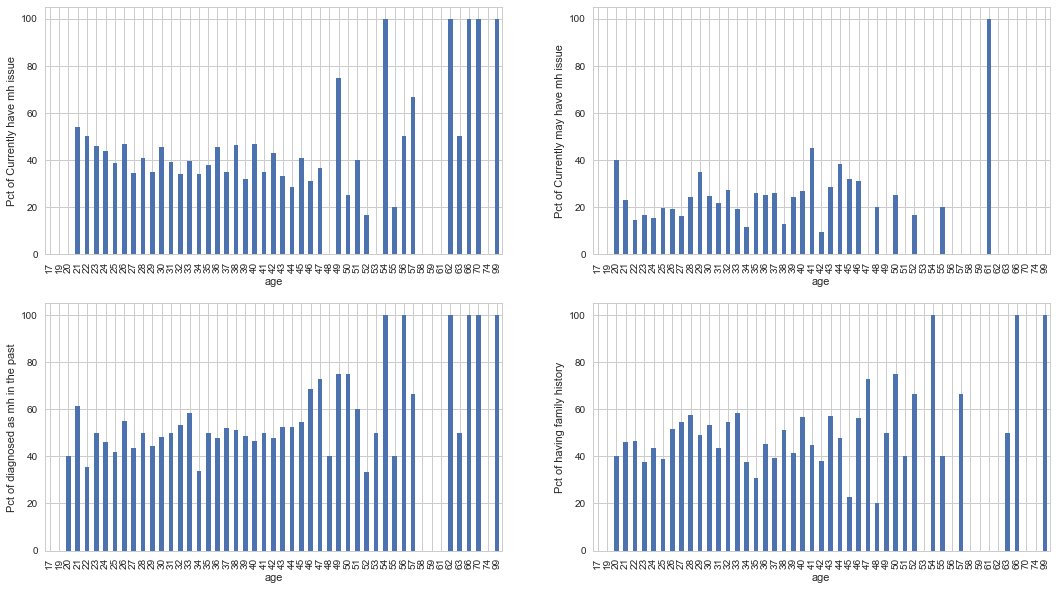

In [36]:
plt.clf()
plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
re['mh_currently_Yes_pct'].plot(kind='bar')
plt.ylabel('Pct of Currently have mh issue')
plt.subplot(2, 2, 2)
re['mh_currently_Maybe_pct'].plot(kind='bar')
plt.ylabel('Pct of Currently may have mh issue')
plt.subplot(2, 2, 3)
re['diagnosed_Yes_pct'].plot(kind='bar')
plt.ylabel('Pct of diagnosed as mh in the past')
plt.subplot(2, 2, 4)
re['family_history_Yes_pct'].plot(kind='bar')
plt.ylabel('Pct of having family history')
plt.show()

#### ** In age between 20 to 50, about 40% people are suffering some kinds of mental health issue, aroud 20% people may suffering mh issue, about 50% people have been diagnosed with mental health problems, about 40% people have family history of mental illness.

In [37]:
re2 = df_re.groupby('age_class')[['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No', 'diagnosed_Yes', 'diagnosed_No', 'family_history_Yes', "family_history_I don't know", 'family_history_No']].agg(['sum'])

In [38]:
re2.columns = re2.columns.droplevel(level=1)

In [39]:
re2

,mh_currently_Yes,mh_currently_Maybe,mh_currently_No,diagnosed_Yes,diagnosed_No,family_history_Yes,family_history_I don't know,family_history_No
age_class,,,,,,,,
1,0,0,3,0.0,3.0,0,0,3
2,158,84,145,182.0,205.0,190,75,122
3,211,120,211,268.0,274.0,250,102,190
4,67,46,62,95.0,80.0,83,32,60
5,15,4,20,22.0,17.0,18,5,16


In [40]:
re2.columns

Index(['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No',
       'diagnosed_Yes', 'diagnosed_No', 'family_history_Yes',
       'family_history_I don't know', 'family_history_No'],
      dtype='object')

In [41]:
current_cols = ['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No']
current = re2.loc[:, current_cols]
current = current.reset_index()
melted1 = pd.melt(current, id_vars=['age_class'], var_name='type', value_name='count')
diagnosed_cols = ['diagnosed_Yes', 'diagnosed_No']
diagnosed = re2.loc[:, diagnosed_cols]
diagnosed = diagnosed.reset_index()
melted2 = pd.melt(diagnosed, id_vars=['age_class'], var_name='type', value_name='count')
family_history_cols = ['family_history_Yes', "family_history_I don't know", 'family_history_No']
family_history = re2.loc[:, family_history_cols]
family_history = family_history.reset_index()
melted3 = pd.melt(family_history, id_vars=['age_class'], var_name='type', value_name='count')

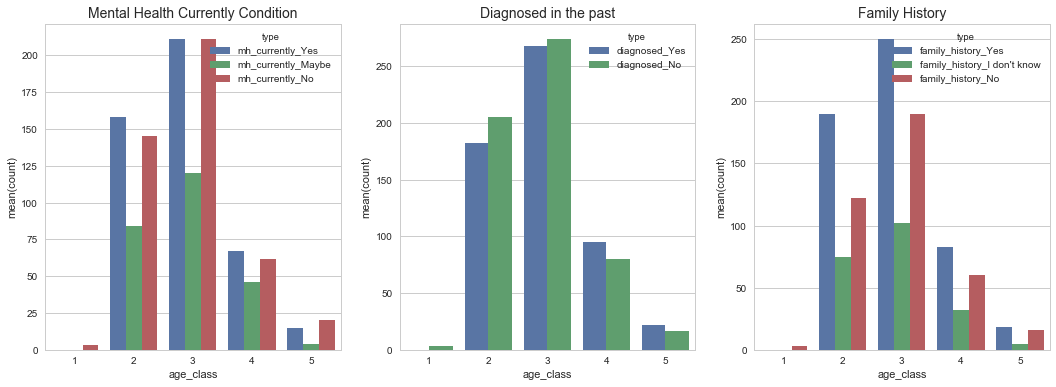

In [42]:
plt.clf()
plt.subplots(figsize=(18, 6))
plt.subplot(1, 3, 1)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted1)
plt.title('Mental Health Currently Condition', fontsize=14)
plt.subplot(1, 3, 2)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted2)
plt.title('Diagnosed in the past', fontsize=14)
plt.subplot(1, 3, 3)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted3)
plt.title('Family History', fontsize=14)
plt.show()

### When having family history, mh_currently and diagnosed distribution

In [43]:
slice1 = relation.loc[relation['family_history']=='Yes', ['age','mh_currently', 'diagnosed', 'age_class']]

In [44]:
slice1['diagnosed'].value_counts()

Yes    379
No     162
Name: diagnosed, dtype: int64

In [45]:
379 / (379 + 162)

0.7005545286506469

### **Using family history information to predict mental health problem will give 70% accuracy.

In [46]:
count = pd.get_dummies(slice1, columns=['mh_currently', 'diagnosed'])

In [47]:
count1 = count.groupby('age')[['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No', 'diagnosed_Yes', 'diagnosed_No']].agg('sum')

In [48]:
count1 = count1.fillna(0)
count1['age_count'] = re['total']
# calculate on each age, how many people have family hisory of mh.
count1['fh_yes_total'] = count1['diagnosed_Yes'] + count1['diagnosed_No']
# calculate when having family history, the pct of currently suffering mh 
count1['mh_currently_Yes_pct_fh'] = (count1['mh_currently_Yes'] / count1['fh_yes_total']) * 100
# calculate when having family history, the pct of currently may suffering mh 
count1['mh_currently_Maybe_pct_fh'] = (count1['mh_currently_Maybe'] / count1['fh_yes_total']) * 100
# calculate when having family history, the pct of having been diagnosed
count1['diagnosed_Yes_pct_fh'] = (count1['diagnosed_Yes'] / count1['fh_yes_total']) * 100
#calculate with family history, the pct of currently suffering mh in total mh people
count1['mh_currently_Yes_pct_t'] = (count1['mh_currently_Yes'] / count1['age_count']) * 100
# calculate when having family history, the pct of currently may suffering mh in total mh people
count1['mh_currently_Maybe_pct_t'] = (count1['mh_currently_Maybe'] / count1['age_count']) * 100
# calculate when having family history, the pct of having been diagnosed in total mh people
count1['diagnosed_Yes_pct_t'] = (count1['diagnosed_Yes'] / count1['age_count']) * 100

In [49]:
count1 = count1.fillna(0)

In [50]:
count1.head()

,mh_currently_Yes,mh_currently_Maybe,mh_currently_No,diagnosed_Yes,diagnosed_No,age_count,fh_yes_total,mh_currently_Yes_pct_fh,mh_currently_Maybe_pct_fh,diagnosed_Yes_pct_fh,mh_currently_Yes_pct_t,mh_currently_Maybe_pct_t,diagnosed_Yes_pct_t
age,,,,,,,,,,,,,
17,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,0.0,0.0,0.0,0.0,0.0,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.0,1.0,1.0,2.0,0.0,5,2.0,0.000000,50.000000,100.000000,0.000000,20.000000,40.000000
21,3.0,1.0,2.0,4.0,2.0,13,6.0,50.000000,16.666667,66.666667,23.076923,7.692308,30.769231
22,11.0,2.0,0.0,8.0,5.0,28,13.0,84.615385,15.384615,61.538462,39.285714,7.142857,28.571429


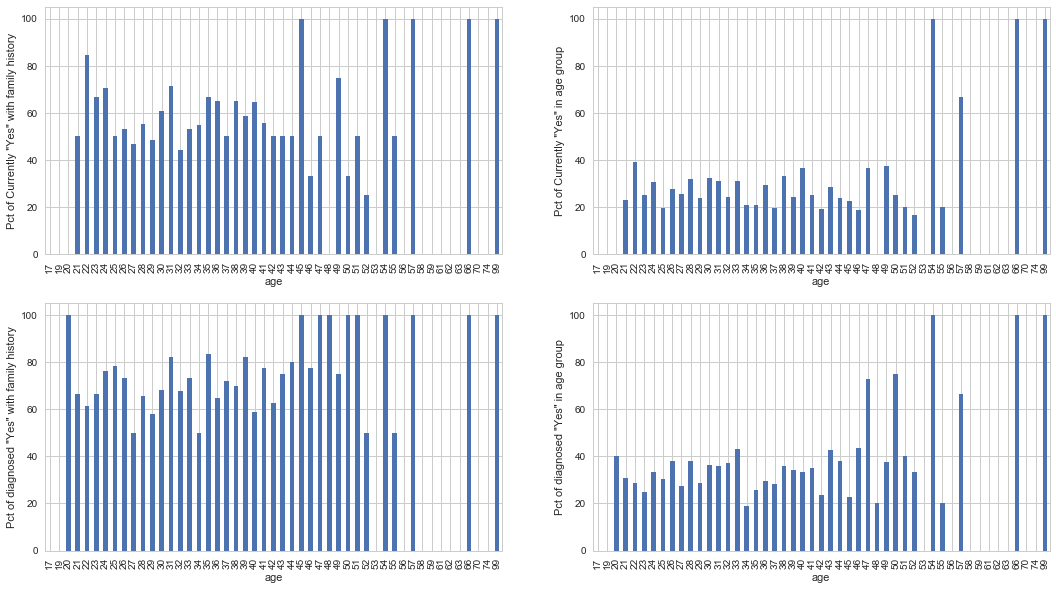

In [51]:
plt.clf()
plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
count1['mh_currently_Yes_pct_fh'].plot(kind='bar')
plt.ylabel('Pct of Currently "Yes" with family history')
plt.subplot(2, 2, 2)
count1['mh_currently_Yes_pct_t'].plot(kind='bar')
plt.ylabel('Pct of Currently "Yes" in age group')
plt.subplot(2, 2, 3)
count1['diagnosed_Yes_pct_fh'].plot(kind='bar')
plt.ylabel('Pct of diagnosed "Yes" with family history')
plt.subplot(2, 2, 4)
count1['diagnosed_Yes_pct_t'].plot(kind='bar')
plt.ylabel('Pct of diagnosed "Yes" in age group')
plt.show()

#### **  In age range of 21 to 50, if having family history of mental illness, around 70% of people have been diagnosed with mental problems (about 30% of their age group), and about 50% of those people are currently still suffering mental disorder (about 25% of their age group).  

In [52]:
count2 = count.groupby('age_class')[['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No', 'diagnosed_Yes', 'diagnosed_No']].agg('sum')

In [53]:
count2 = count2.fillna(0)
current = count2.loc[:, ['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No']]
current = current.reset_index()
melted1 = pd.melt(current, id_vars=['age_class'], var_name='type', value_name='count')
diagnosed = count2.loc[:, ['diagnosed_Yes', 'diagnosed_No']]
diagnosed = diagnosed.reset_index()
melted2 = pd.melt(diagnosed, id_vars=['age_class'], var_name='type', value_name='count')

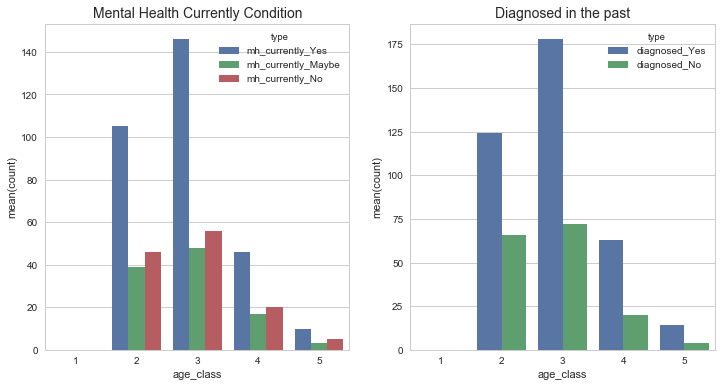

In [54]:
plt.clf()
plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted1)
plt.title('Mental Health Currently Condition', fontsize=14)
plt.subplot(1, 2, 2)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted2)
plt.title('Diagnosed in the past', fontsize=14)
plt.show()

###  When not having family history mh_currently and diagnosed distribution

In [55]:
slice2 = relation.loc[relation['family_history']=='No', ['age','mh_currently', 'diagnosed', 'age_class']]
count = pd.get_dummies(slice2, columns=['mh_currently', 'diagnosed'])
count1 = count.groupby('age')[['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No', 'diagnosed_Yes', 'diagnosed_No']].agg('sum')
count1 = count1.fillna(0)
count1['age_count'] = re['total']
# calculate on each age, how many people have family hisory of mh.
count1['fh_yes_total'] = count1['diagnosed_Yes'] + count1['diagnosed_No']
# calculate when having family history, the pct of currently suffering mh 
count1['mh_currently_Yes_pct_fh'] = (count1['mh_currently_Yes'] / count1['fh_yes_total']) * 100
# calculate when having family history, the pct of currently may suffering mh 
count1['mh_currently_Maybe_pct_fh'] = (count1['mh_currently_Maybe'] / count1['fh_yes_total']) * 100
# calculate when having family history, the pct of having been diagnosed
count1['diagnosed_Yes_pct_fh'] = (count1['diagnosed_Yes'] / count1['fh_yes_total']) * 100
#calculate with family history, the pct of currently suffering mh in total mh people
count1['mh_currently_Yes_pct_t'] = (count1['mh_currently_Yes'] / count1['age_count']) * 100
# calculate when having family history, the pct of currently may suffering mh in total mh people
count1['mh_currently_Maybe_pct_t'] = (count1['mh_currently_Maybe'] / count1['age_count']) * 100
# calculate when having family history, the pct of having been diagnosed in total mh people
count1['diagnosed_Yes_pct_t'] = (count1['diagnosed_Yes'] / count1['age_count']) * 100
count1 = count1.fillna(0)

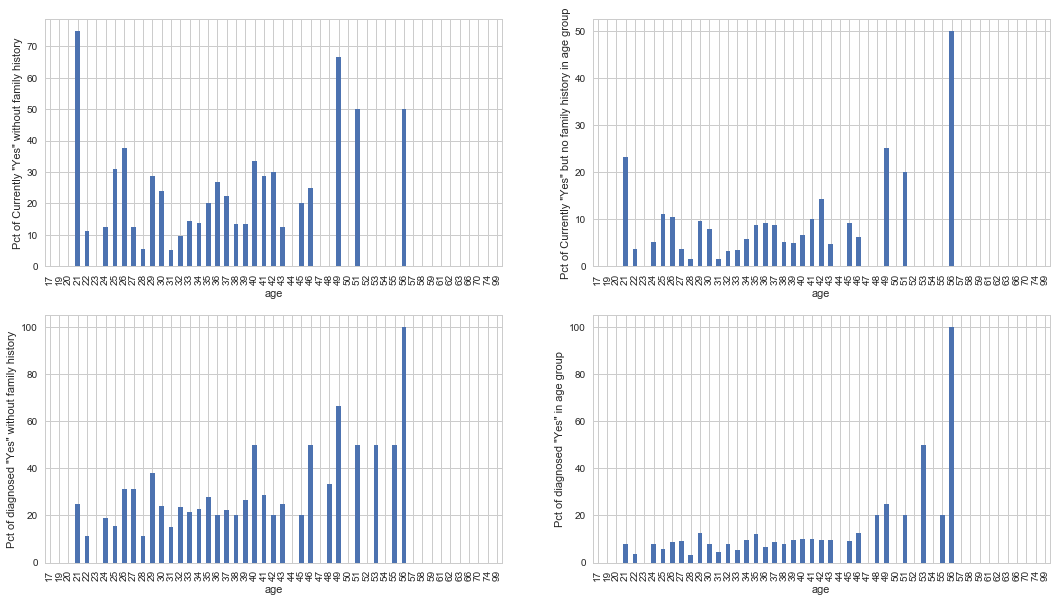

In [56]:
plt.clf()
plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
count1['mh_currently_Yes_pct_fh'].plot(kind='bar')
plt.ylabel('Pct of Currently "Yes" without family history')
plt.subplot(2, 2, 2)
count1['mh_currently_Yes_pct_t'].plot(kind='bar')
plt.ylabel('Pct of Currently "Yes" but no family history in age group')
plt.subplot(2, 2, 3)
count1['diagnosed_Yes_pct_fh'].plot(kind='bar')
plt.ylabel('Pct of diagnosed "Yes" without family history')
plt.subplot(2, 2, 4)
count1['diagnosed_Yes_pct_t'].plot(kind='bar')
plt.ylabel('Pct of diagnosed "Yes" in age group')
plt.show()

#### ** When no family history of mental illness, it is hard to tell whether the person will have mental health issue. In age between 20 -50, less than 10% of the total people in their age group have been diagnosed with mental health problem without family history record. So family history is an important variable to predict whether or not suffring from mh disorder.

In [57]:
count2 = count.groupby('age_class')[['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No', 'diagnosed_Yes', 'diagnosed_No']].agg('sum')
count2 = count2.fillna(0)
count2

,mh_currently_Yes,mh_currently_Maybe,mh_currently_No,diagnosed_Yes,diagnosed_No
age_class,,,,,
1,0,0,3,0,3
2,25,17,80,27,95
3,31,37,122,43,147
4,13,12,35,16,44
5,2,1,13,5,11


In [58]:
current = count2.loc[:, ['mh_currently_Yes', 'mh_currently_Maybe', 'mh_currently_No']]
current = current.reset_index()
melted1 = pd.melt(current, id_vars=['age_class'], var_name='type', value_name='count')
diagnosed = count2.loc[:, ['diagnosed_Yes', 'diagnosed_No']]
diagnosed = diagnosed.reset_index()
melted2 = pd.melt(diagnosed, id_vars=['age_class'], var_name='type', value_name='count')

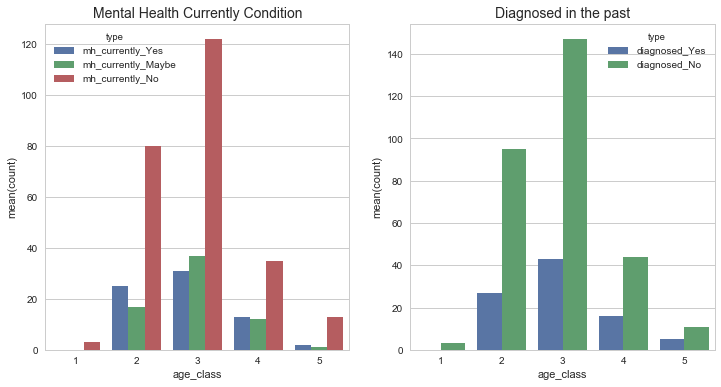

In [59]:
plt.clf()
plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted1)
plt.title('Mental Health Currently Condition', fontsize=14)
plt.subplot(1, 2, 2)
_ = sns.barplot(x='age_class', y='count', hue='type', data=melted2)
plt.title('Diagnosed in the past', fontsize=14)
plt.show()

### 2. Seek treatment

In [60]:
relation['sought_treatment'].value_counts()

1    657
0    489
Name: sought_treatment, dtype: int64

In [61]:
slice3 = relation[['diagnosed', 'sought_treatment']]

In [62]:
slice3 = pd.get_dummies(slice3, columns=['diagnosed', 'sought_treatment'])

In [63]:
np.sum(slice3[slice3['diagnosed_Yes'] == 1]['sought_treatment_1']) / np.sum(slice3['diagnosed_Yes'])

0.94179894179894175

** about 94% of people who have diagnosed with mental disorder have sought for treatment. SO we treated seaking treatment almost the same with diagnosed (target label).

### 3. Enterprise enphasis

In [64]:
columns = ['tech_company', 'tech_related', 'enterprise_mh_benefit','enterprise_mh_options', 'enterprise_mh_emphasis','enterprise_offer_resources', 'anonymity_protection',]
df = relation[columns]

In [65]:
df.describe()

,tech_company,tech_related,enterprise_mh_benefit,enterprise_mh_options,enterprise_mh_emphasis,enterprise_offer_resources,anonymity_protection
count,1146.0,1146.0,1146,1146,1146,1146,1146
unique,2.0,2.0,3,3,3,3,3
top,1.0,1.0,Yes,I am not sure,No,No,I don't know
freq,883.0,883.0,531,485,813,531,742


In [66]:
# due to tech_company have the same value with tech_related, so drop tech_related column
df = df.drop(['tech_related'], axis=1)

In [67]:
# in column enterprise_mh_options replace value of "I am not sure" with "I don't know" to keep same with other column, for easy couting.
df['enterprise_mh_options'] = df['enterprise_mh_options'].replace("I am not sure", "I don't know")

In [68]:
df_tech = df[df['tech_company'] == 1.0]

In [69]:
df_count = pd.DataFrame()
df_count['enterprise_mh_benefit'] = df_tech['enterprise_mh_benefit'].value_counts(dropna=True)
df_count['enterprise_mh_options'] = df_tech['enterprise_mh_options'].value_counts(dropna=True)
df_count['enterprise_mh_emphasis'] = df_tech['enterprise_mh_emphasis'].value_counts(dropna=True)
df_count['enterprise_offer_resources'] = df_tech['enterprise_offer_resources'].value_counts(dropna=True)
df_count['anonymity_protection'] = df_tech['anonymity_protection'].value_counts(dropna=True)

In [70]:
df_count['Answers'] = df_count.index

In [71]:
df_count = df_count.drop(['Not eligible for coverage / N/A'], axis=0)

In [72]:
df_count

,enterprise_mh_benefit,enterprise_mh_options,enterprise_mh_emphasis,enterprise_offer_resources,anonymity_protection,Answers
Yes,408,233.0,156.0,194.0,241.0,Yes
I don't know,240,374.0,80.0,268.0,573.0,I don't know
No,235,276.0,647.0,421.0,69.0,No


In [73]:
melted = pd.melt(df_count, id_vars=['Answers'], var_name='type', value_name='frequency')

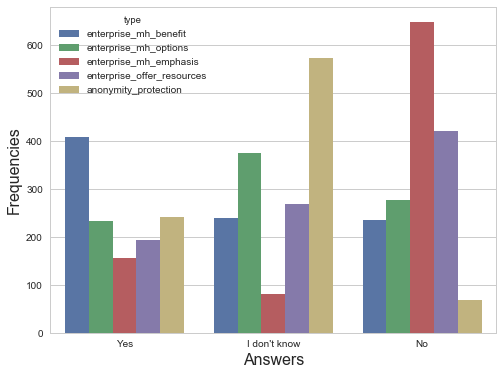

In [74]:
plt.clf()
plt.subplots(figsize=(8, 6))
_ = sns.barplot(x='Answers', y='frequency', hue='type', data=melted)
plt.xlabel('Answers', fontsize=16)
plt.ylabel('Frequencies', fontsize=16)
plt.show()

#### ** Only 46%(408/883) of the tech_company supply mental health insurance, and only 28% (233/833) of the people in tech_company know that they have option to choose in health insurance. Most tech_company haven't taken enough attention about mental health problem, because the employer in that company never formally discussed mental health. Only 22% (194/883) of the tech_company offer resources for seeking help. Only 27% of the people in tech_company know that they can have anonymity protection on mental health problems.

## IV. Mental health issue (currently) with company size, tech_company, gender, remote and benefit relationship

In [75]:
col_names = ['company_size', 'tech_company', 'enterprise_mh_benefit',
       'enterprise_mh_options', 'enterprise_mh_emphasis',
       'enterprise_offer_resources', 'anonymity_protection',
       'mh_leave_request', 'mh_currently', 'diagnosed', 'family_history',
       'gender', 'remote', 'age_class']
df = relation[col_names]


In [76]:
df.describe()

,company_size,tech_company,enterprise_mh_benefit,enterprise_mh_options,enterprise_mh_emphasis,enterprise_offer_resources,anonymity_protection,mh_leave_request,mh_currently,diagnosed,family_history,gender,remote,age_class
count,1146,1146.0,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
unique,6,2.0,3,3,3,3,3,6,3,2,3,3,3,5
top,3,1.0,Yes,I am not sure,No,No,I don't know,2,Yes,No,Yes,Male,Sometimes,3
freq,292,883.0,531,485,813,531,742,281,451,579,541,850,611,542


In [77]:
df[df['diagnosed'] == 'Yes']['mh_currently'].value_counts()


Yes      402
Maybe     98
No        67
Name: mh_currently, dtype: int64

** only 11.8%(67/567) of the people diagnosed with mental illness get recovered.

In [78]:
df[df['diagnosed'] == 'No']['mh_currently'].value_counts()

No       374
Maybe    156
Yes       49
Name: mh_currently, dtype: int64

** about 8.5% of the people who haven't been diagnosed with mental illness currently get mental health issue.

### Due to about 10% of people changed from diagnosed with mental illness to without, and less than 10% of people changed from without mental illness to with. I used diagnosed feature as my target label. 'sought treatment' as a consequencial result of 'diagnosed', 94% of people who have diagnosed with mental disorder have sought for treatment. So it cannot be used as prediction feature.

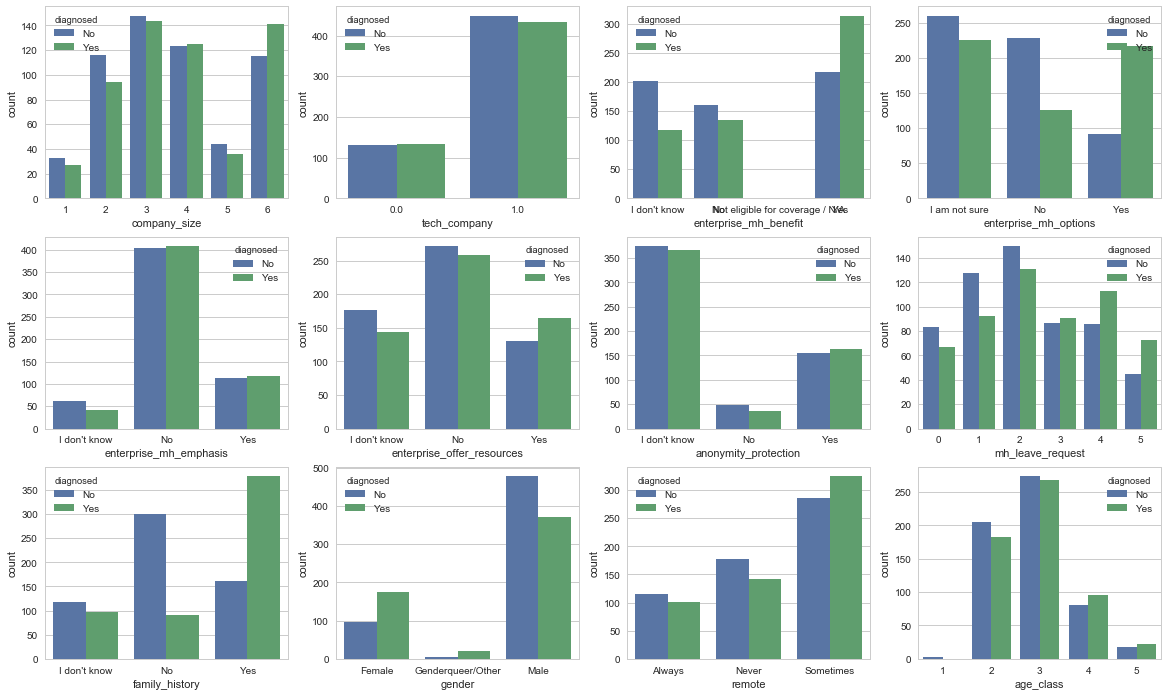

In [79]:
plt.clf()
cols = ['company_size', 'tech_company', 'enterprise_mh_benefit',
       'enterprise_mh_options', 'enterprise_mh_emphasis',
       'enterprise_offer_resources', 'anonymity_protection',
       'mh_leave_request', 'family_history','gender', 'remote', 'age_class']
plot_index = 1
plt.subplots(figsize=(20, 12))
for name in cols:
    plt.subplot(3, 4, plot_index)
    sns.countplot(x=name, hue='diagnosed', data=df)
    plot_index += 1
plt.show()   

In [80]:
relation.to_csv('relation.csv')